# Intertemporal Choice Problem Set 4

## Mateo Velásquez-Giraldo

In [1]:
%matplotlib inline

# Setup
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import HARK

#Plot formatting
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')

width = 12
height = 6

## 1. Buffer Stock Saving and Balance Sheets

## a)

### i.)

A lender who lends a given amount to the consumer in period $-1$ is guaranteed to be able to seize payments of up to $N_0$ for the rest of the consumers' life if he does not pay back, since if:

- The consumer remains employed at $t=0$ his income will be $l_0 W_0>N_0$.
- The consumer becomes unemployed, his income will forever be $N_0$.

Thus, if the lender is infinitely risk averse and weights the posibility of the agent becoming unemployed as the only and worse case scenario, he will still be willing to lend the consumer any ammount up to $$\sum_{t=0}^\infty \frac{N_0}{R^{t+1}}$$ which is the present value (at time -1) of the minimum stream of income he is guaranteed to be able to sieze. Notice that

$$\sum_{t=0}^\infty \frac{N_0}{R^{t+1}}=\frac{N_0}{R}\frac{1}{1-1/R}= \frac{N_0}{R} (\frac{R}{R-1}) = \frac{N_0}{r}$$

### ii.)

An agent that becomes unemployed on period $0$ will behave as a perfect foresight consumer with a permanent income of $N_0$. His human wealth will be $H_0 = N_0 R/r$ and his bank balances will be $B_0 = A_{-1} R$.

The return impatience condition guarantees that the consumption solution is well defined for this problem and has the form 

\begin{equation}
c_0 = \left(A_{-1}R + N_0\frac{R}{r}\right)\times\frac{R - (R\beta)^{1/\rho}}{R} = R\left(A_{-1} + \frac{N_0}{r}\right)\times\left(1 - \frac{(R\beta)^{1/\rho}}{R}\right)
\end{equation}

from which is clear that, if $A_{-1}>-N_0/r$, the return impatience condition $(R\beta)^{1/\rho}/R<1$ guarantees $c_0>0$.

The return impatience condition also guarantees that, as in the infinite horizon perfect foresight model, consumption will evolve according to

\begin{equation}
c_{t+1} = c_t \times (R\beta)^{1/\rho}
\end{equation}

which, considering that $c_0$ is positive (if $A_{-1}>-\underline{H}_{-1}$), guarantees a perpetual stream of strictly positive consumption for the unemployed consumer.

### iii.)

The unemployed consumer behaves as a perfect foresight consumer and therefore, only the present value of his overall wealth matters for determining his consumption path.

The lump sum $N_0 R/r$ is exactly the present discounted value of a permanent $N_0$ income:

$$\sum_{t=0}^\infty \frac{N_0}{R^t} = N_0\frac{1}{1-1/R} = N_0 R/r.$$

Therefore, the permanent $N_0$ payments and the lump-sum transfer both produce exactly the same present value of overall wealth for the unemployed consumer and thus generate the same consumption path.

### iv.)

Using the definitions of $\underline{h}_{-1}$, $N_0$, and the growth rate of income, we have 

\begin{align}
\underline{h}_{-1} = \frac{N_0/r}{l_{-1}W_{-1}} = \frac{\eta l_0W_0/r}{l_{-1}W_{-1}} = \frac{\eta}{r} \frac{l_0W_0}{l_{-1}W_{-1}} = \frac{\eta\Gamma}{r},
\end{align}

which is the desired result.

The expression comes from the fact that we have normalized the lump sum by the income level. However, as $\underline{h}_{-1}$ represents the value at -1 of a transfer happening in $0$, there is a $\Gamma$ that captures the change in the income by which the amount is normalized.

### v.)

The phase diagram is determined by the $\Delta m^e_{t+1}=0$ and $\Delta c^e_{t+1}=0$ loci, and the stable arm.

To see that the $\Delta m^e_{t+1}=0$ locus is unchanged by the introduction of unemployment benefits, notice from Eq. (51) in the TractableBufferStock handout that its equation is $$c^e = (1 - \mathcal{R}^{-1})m^e + \mathcal{R}^{-1},$$ which is in no way modified by the change in the model.

The $\Delta c^e_{t+1}=0$ locus is originally given by (from equation 34 in the handout) $$c^e_{t} = c^u_{t+1}\Pi = (m^e_t - c^e_t)\mathcal{R}\kappa\Pi.$$

However, after the introduction of unemployment benefits, $c^u_{t+1}$ changes because, as we saw, the unemployed consumer's overall wealth increases by $\eta l_{t+1}W_{t+1}R/r$, which normalized by $l_{t+1} W_{t+1}$ becomes $\frac{\eta R}{r}$. Therefore, the locus is given by
\begin{align}
c^e_{t} &= \left((m^e_t - c^e_t)\mathcal{R} + \frac{\eta R}{r} \right)\kappa\Pi\\
&= \left((m^e_t - c^e_t)\mathcal{R} + \frac{\eta \Gamma\mathcal{R}}{r} \right)\kappa\Pi\\
&= \left((m^e_t + \frac{\eta \Gamma}{r} - c^e_t)\mathcal{R} \right)\kappa\Pi
\end{align}
which can diagramatically be seen as shifting the locus to the left by exactly $\eta\Gamma/r$. As the original consumption function intersects the locus at $c=0$, $m=0$ and the new one intersects the new locus at $c=0$, $m = -\eta \Gamma / r$, the consumption function, measured on the $m$ axis, shifts to the left by $\eta \Gamma/r$. 

The intuition behind the result is that the agent is now guaranteed an ammount of human wealth-to-income $\eta R/r$ if he becomes unemployed. Therefore the employed consumer will behave as if he had an additional ammount of wealth-to-income with a value at $t+1$ of $\eta R/r$. This amount of "extra wealth-to-income" is $\eta \Gamma / r$.

Thus, the consumption function shifts to the left by $\eta \Gamma / r$.

The following code produces an example of a situation in which the leftward shift makes the target wealth negative.

In [2]:
# Import tractable buffer stock agent and default parameters
from HARK.ConsumptionSaving.TractableBufferStockModel import TractableConsumerType
import HARK.ConsumptionSaving.ConsumerParameters as Params # Import default parameters

CRRA       = Params.CRRA 
Rfree      = Params.Rfree 
DiscFac    = Params.DiscFac
PermGroFac = Params.PermGroFac[0]
rfree      = Rfree-1
UnempP     = 0.01
Gamma = PermGroFac/(1-UnempP)

# Parameter dictionary for the TBS agent
TBS_params =  {'UnempPrb' : UnempP,
               'DiscFac' : DiscFac,
               'Rfree' : Rfree,
               'PermGroFac' : PermGroFac,
               'CRRA' : CRRA}

# Size of unemployment benefits
eta = 0.45

# Find the shift
shift = eta*Gamma/rfree

# Create and solve agent
TBSagent = TractableConsumerType(**TBS_params)
TBSagent.solve()

# Extract target wealth
target = TBSagent.mTarg

The new target wealth-to-income ratio is: -4.73


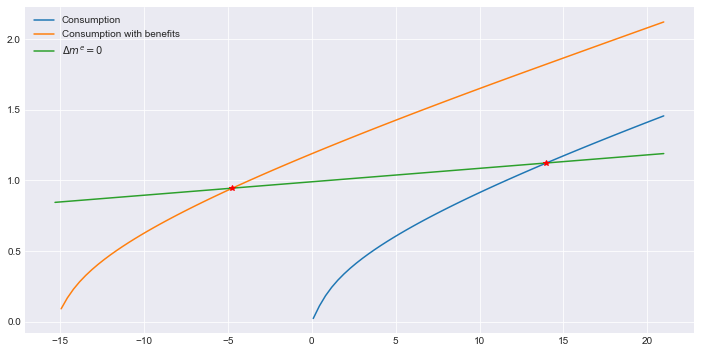

In [3]:
from scipy.optimize import fsolve
num_m = 100
m_min = -shift
m_max = 1.5*target
m_range = np.linspace(m_min, m_max, num_m)

# Extract c_function
cfun = TBSagent.solution[0].cFunc

# Construct c_function with benefits
cfun_b = lambda m: cfun(m + shift)

# Find delta_M = 0 locus
Rcal = Rfree/Gamma
m_locus = lambda m: (1-1/Rcal)*m + 1/Rcal

# Plot
plt.figure(figsize = (width, height))
plt.plot(m_range, cfun(m_range), label = 'Consumption')
plt.plot(m_range, cfun_b(m_range), label = 'Consumption with benefits')
plt.plot(m_range, m_locus(m_range), label = '$\Delta m^e = 0$')
plt.plot(target,cfun(target),'*r')

# Find new target wealth
target_b = fsolve(lambda m: cfun_b(m) - m_locus(m), 0)
plt.plot(target_b,cfun_b(target_b),'*r')
plt.legend()

print("The new target wealth-to-income ratio is: %1.2f" %(target_b))

### vi.)

In the original tractable buffer stock model, there is a "natural borrowing constraint" in the sense that an agent will never incurr in debt. This is so because if the agent becomes unemployed and has non-positive assets he would have a null consumption for the rest of his life, giving him infinitely negative utility.

With the introduction of unemployment benefits, the agent is guaranteed a positive income if he becomes unemployed, and therefore the natural fear of borrowing relaxes: if the present value of his debt is less than the present value of benefits, he will be able to pay and have positive consumption for the rest of his life.

Therefore, the agent with benefits is now willing to have negative assets (debt). This is thus, a relaxation of the natural borrowing constraint. 

## b)

In [4]:
def me_dynamic(agent,mt,ct):
    mt1 = (mt - ct)*agent.Rcal + 1
    return(mt1)

def cfun_b(agent,m):
    return( agent.solution[0].cFunc(m + agent.shift) )

def m_locus(agent,m):
    return((1-1/agent.Rcal)*m + 1/agent.Rcal)

def saving_rate(agent, m, c):
    
    # Obtain end-of-period assets of the previous period
    # m_t = a_{t-1}R + P_t -> a_{t-1} = (m_t - P_t)/R
    # So normalizing by income a_{t-1} = (m_t - 1)/R
    a_t1 = (m - 1)/agent.Rfree
    
    # Find total income and saving rate
    # Income = r*a_{t-1} + P_t
    # Normalizing: income = r*a_{t-1} + 1
    tot_inc = (agent.Rfree-1)*a_t1 + 1
    s_rate = (tot_inc - c)/tot_inc
    
    return(s_rate)

def experiment(agent0,agent1,m0,periods,burnin):

    # Find relevant parameters and functions for each agent
    agents = [agent0, agent1]
    for agent in agents:
        
        # Find important params
        agent.Gamma = agent.PermGroFac/(1-agent.UnempPrb)
        agent.shift = agent.eta*agent.Gamma/(agent.Rfree - 1)
        agent.Rcal = agent.Rfree/agent.Gamma
        
        # Target wealth with benefits
        agent.target_b = fsolve(lambda m: cfun_b(agent,m) - m_locus(agent,m), 0)[0]
    
    # Phase diagrams
    num_m = 100
    m_min = -max([agent.shift for agent in agents])
    m_max = 1.5*max([abs(agent.target_b) for agent in agents])
    m_range = np.linspace(m_min, m_max, num_m)
    
    agents[0].label = 'Orig'
    agents[1].label = 'New'
    plt.figure(figsize = (width, height))
    for agent in agents:
        plt.plot(m_range,cfun_b(agent, m_range), label = agent.label + ' $c(m)$')
        plt.plot(m_range,m_locus(agent, m_range),'--k')
        plt.plot(agent.target_b, cfun_b(agent, agent.target_b),"*", label = agent.label + ' target') 
    plt.legend()
    plt.title('Phase diagram')
    plt.xlabel('Assets to income ratio $m$')
    plt.ylabel('Consumption to income ratio $c$')
    
    # Time diagram
    time = range(periods+burnin*2)
    
    # Initialize consumption, m, and saving rate
    m = np.zeros(len(time))
    m[0] = agents[0].target_b
    c = np.zeros(len(time))
    c[0] = cfun_b(agents[0],m[0])
    s = np.zeros(len(time))
    s[0] = saving_rate(agents[0],m = m[0],c = c[0])
    
    for i in range(1,periods+burnin*2):
        
        # Determine which agent's behavior is used depending on the
        # time period.
        if ( i>(burnin-1) and i <= (burnin - 1 + periods) ):
            ag = 1
        else:
            ag = 0
        
        # Update variables
        m[i] = me_dynamic(agents[ag],m[i-1],c[i-1])
        c[i] = cfun_b(agents[ag],m[i])
        s[i] = saving_rate(agents[ag],m = m[i],c = c[i])
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (width, height))
    
    ax1.plot(time,c,'*')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Consumption to income ratio')
    ax1.set_title('Consumption')
    
    ax2.plot(time,s,'*')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Savings rate')
    ax2.set_title('Saving')

### i.)

The following code simulates a situation in which a consumer starts out with his desired level of market resources and, suddently, he adopts the belief that the probability of becoming unemployed halves. This belief lasts for four periods and then reverts to the original state.

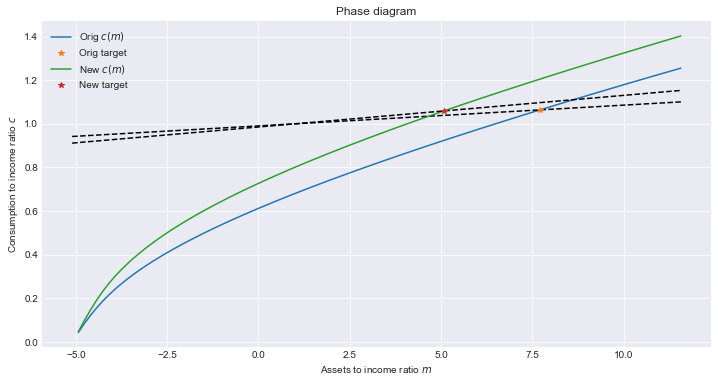

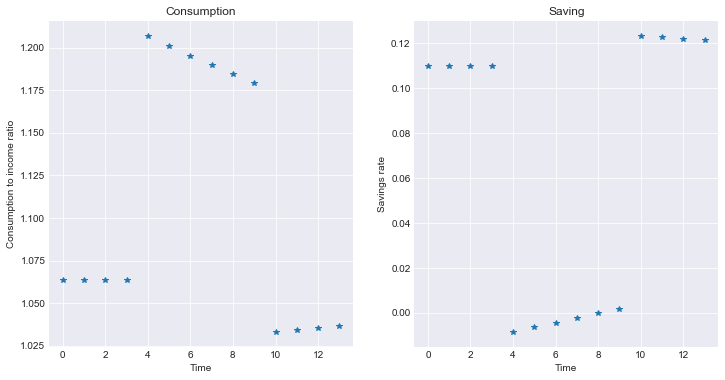

In [5]:
params_0 = {'UnempPrb' : UnempP,
            'DiscFac' : DiscFac,
            'Rfree' : Rfree,
            'PermGroFac' : PermGroFac,
            'CRRA' : CRRA}

params_1 = {'UnempPrb' : UnempP/2,
            'DiscFac' : DiscFac,
            'Rfree' : Rfree,
            'PermGroFac' : PermGroFac,
            'CRRA' : CRRA}

# Create and solve agent
agent0 = TractableConsumerType(**params_0)
agent1 = TractableConsumerType(**params_1)
agent0.solve()
agent1.solve()

agent0.eta = 0.15
agent1.eta = 0.15

experiment(agent0,agent1,m0 = agent0.mTarg,periods = 6, burnin = 4)

The graphs above show that the drop in the probability of unemployment relaxes the precautionary motive and makes the agent's target level of wealth lower. Therefore, he starts dis-saving in order to move to his new target. After the period of optimism ends, he is under his original target wealth and thus needs to adopt a higheer saving rate than the original in order to increase his market resources back to where he wants them to be.

### ii.)

The following code simulates a situation in which a consumer starts out with his desired level of market resources and, suddently, he adopts the belief that the expected wage growth ($g$) increases b 50%. This belief lasts for four periods and then reverts to the original state.

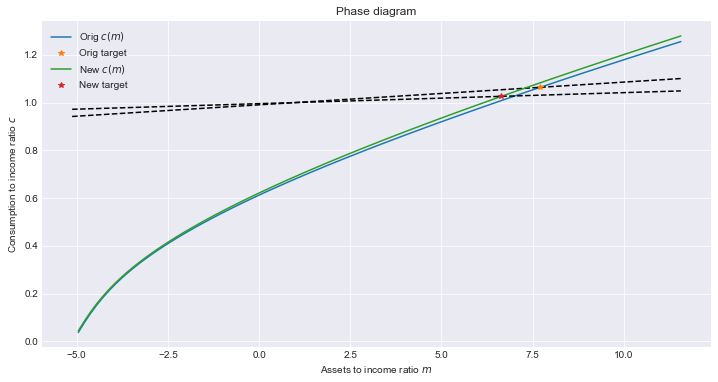

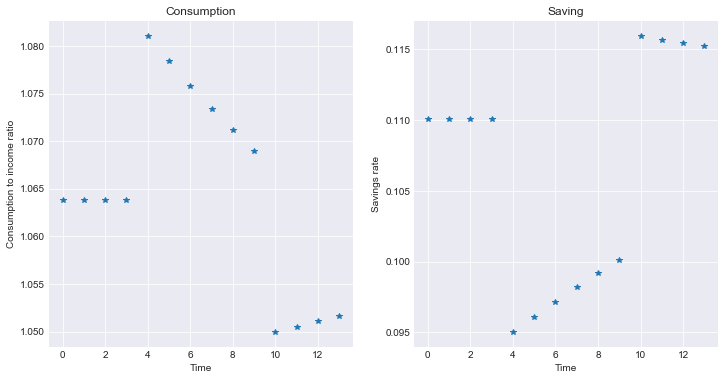

In [6]:
params_0 = {'UnempPrb' : UnempP,
            'DiscFac' : DiscFac,
            'Rfree' : Rfree,
            'PermGroFac' : PermGroFac,
            'CRRA' : CRRA}

params_1 = {'UnempPrb' : UnempP,
            'DiscFac' : DiscFac,
            'Rfree' : Rfree,
            'PermGroFac' : 1+1.5*(PermGroFac-1),
            'CRRA' : CRRA}

# Create and solve agent
agent0 = TractableConsumerType(**params_0)
agent1 = TractableConsumerType(**params_1)
agent0.solve()
agent1.solve()

agent0.eta = 0.15
agent1.eta = 0.15

experiment(agent0,agent1,m0 = agent0.mTarg,periods = 6, burnin = 4)

The change in beliefs makes the agent more growth impatient: he presumes he will be richer in the future so he would like to consume more. This makes his target wealth lower and he reduces his saving rate. When the period of optimism ends, he needs to save at a rate higher than the original to get back to the original target wealth and make up for the extra consumption made in the optimism period.

### iii.)

The following code simulates a situation in which a consumer starts out with his desired level of market resources and, suddently, he adopts the belief that $\eta$ passes from $0.15$ to $0.3$, making the unemployment support twice as generous. This belief lasts for four periods and then reverts to the original state.

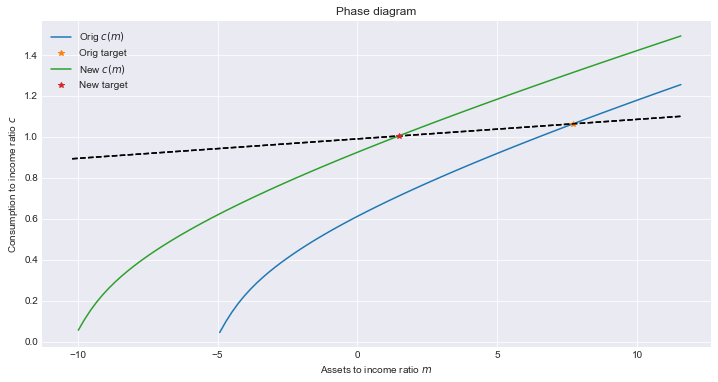

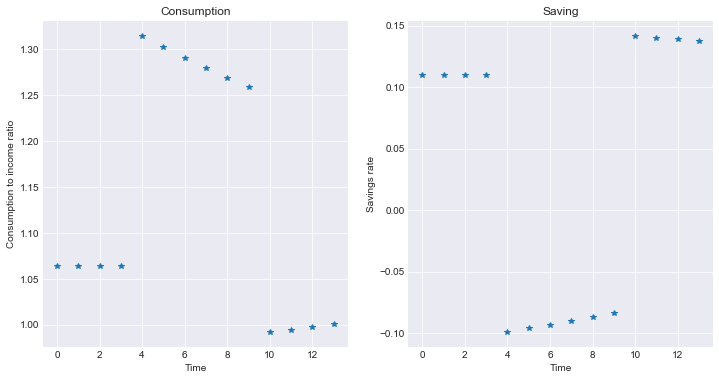

In [7]:
params_0 = {'UnempPrb' : UnempP,
            'DiscFac' : DiscFac,
            'Rfree' : Rfree,
            'PermGroFac' : PermGroFac,
            'CRRA' : CRRA}

params_1 = {'UnempPrb' : UnempP,
            'DiscFac' : DiscFac,
            'Rfree' : Rfree,
            'PermGroFac' : PermGroFac,
            'CRRA' : CRRA}

# Create and solve agent
agent0 = TractableConsumerType(**params_0)
agent1 = TractableConsumerType(**params_1)
agent0.solve()
agent1.solve()

agent0.eta = 0.15
agent1.eta = 0.30

experiment(agent0,agent1,m0 = agent0.mTarg,periods = 6, burnin = 4)

Adopting the belief that the generosity of unemployment benefits increased makes the agents precautionary saving motive lower: he needs to save less as he believes his unemployment market resources are larger. Thus, he dis-saves as he does not need as much precautionary wealth as before. However, after optimism ends he needs to recover with a saving rate that is higher than the original.

## 2. Asset Pricing In A Financial Crisis

### a) 

The Lucas Asset pricing model of the market for trees, tells us that if we assume a CRRA utility function, the equilibrium price of an asset will be $$P_t = \frac{d_t^\rho}{\vartheta},$$ where $d_t$ is the dividend of the asset and $\vartheta$ is the time preference rate.

Therefore in absence of other assets, and in a world without uncertainty of dividends, if the dividends per share of the subprime debt halves, their price would become $2^{-\rho}P_S$ (with logarithmic utility it would halve too) and $P_S/D_S$ would become $$\frac{2^-\rho P_S}{2^-1 D_S}=2^{1-\rho}\frac{P_S}{D_S}.$$

Thus, if we assume logarithmic utility ($\rho = 1$), $P_S/D_S$ would stay the same.

Under the C-CAPM model, with uncertainty and other assets, if we assume the covariance between $S$ and consumption is unaltered by the changes to dividends (for instance, say that $S$ is a small portion of the agents' portfolio and can be substituted), then the market will require the same excess returns as before but then, as $D_S$ decreased $P_S$ has to decrease too.

In this case agents would move their funds to the riskless asset (if there is one) or the _other assets_, but since we assume the subprime market is small, the effect on $P_O$ and $P_O/D_O$ is neglegible.

### b) 

The expected return of an asset is $$E_t[R_{t+1}] = E_t\left[1+\frac{\Delta P_{t+1}}{P_t} + \frac{d_{t+1}}{P_t}\right] = E_t\left[1 + \frac{d_{t+1}}{P_t}\right]$$ if we assume there is no predictability in the changes of prices ($E_t[\Delta P_{t+1}]=0$).

Also, the C-CAPM model shows that for every asset $i$,

\begin{equation}
E_{t}\left[ R_{t+1,i} - R \right] \approx \rho cov_t (\Delta \log c_{t+1},R_{t+1,i})
\end{equation}

Which in our case becomes

\begin{align}
E_t \left[ 1 + d_{t+1,i} /P_{t,i} \right] - R &\approx \rho cov_t (\Delta \log c_{t+1},1 + d_{t+1,i}/P_{t,i}) \\
\frac{E_t[d_{t+1,i}]}{P_{t,i}} - r &\approx \rho cov_t (\Delta \log c_{t+1}, d_{t+1,i})/P_{t,i}\\
E_t[d_{t+1,i}] - rP_{t,i} &\approx \rho cov_t (\Delta \log c_{t+1}, d_{t+1,i}) = \rho \sigma_{\Delta log c}\sigma_{d_i} corr_t (\Delta \log c_{t+1}, d_{t+1,i})
\end{align}

An increase in the variance of $d_{t+1,S}$ would increase $\sigma_{d_S}$ in the right hand side. If we assume that this effect is larger that any alteration of $corr_t (\Delta \log c_{t+1}, d_{t+1,i}$ due to portfolio rebalancing by the agents (for instance, if we assume that returns from $S$ are a small part of agents' consumption budgets) then the right hand side of the equation raises in magnitude. Therefore, a higher exess return would be demanded from the subprime debt, since we assume the covariance to be positive. As the expected value of dividends remains constant, the only way of also increasing the left hand side and preserving the equation would be a decrease of the share prices $P$. Therefore, the level of $P_S$ lowers and so does $P_S/D_S$.

This phoenomenon is the model's representation of the intuitive principle that volatility is undesirable and thus, if expected returns are held constant, a more volatile asset will need to have a lower price.

Again, as we assume that the subprime debt market is small relative to the size of the other market, the other market will remain mostly unaffected by this change in the desirability of S. Therefore we would expect $P_O$ and $P_O/D_O$ to remain roughly the same.

### c)

An increase in the level of risk aversion with CRRA utility is represented as an increase in $\rho$. Therefore, using the previous expression 

\begin{equation}
\frac{E_t[d_{t+1,i}]}{P_{t,i}} - r \approx \rho cov_t (\Delta \log c_{t+1}, d_{t+1,i})/P_{t,i}
\end{equation}

we would expect the higher $\rho$ to increase the right hand side for both $S$ and $O$ since both are assumed to have a positive covariance with consumption. Given that we assumed the covariance with consumption to be greater for $S$, we would expect a higher effect for $S$. As analyzed in b) this would make the prices of both assets decrease as the risky assets become less desirable to the agents and they move resources to the risk-free asset.

Therefore we would expect both $P_S$ and $P_O$ to decrease their levels, and as there is no change in their expected dividends, $P_O/D_O$ and $P_S/D_S$ would decrease too. The decreases would be greater for the subprime debt.
